In [1]:
import importlib
import subprocess
import sys

#checks if a library is installed and installs it if not
def install_and_import(package):
    try:
        importlib.import_module(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_and_import("pandas")
install_and_import("matplotlib")
install_and_import("numpy")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#load the CSV file into a dataframe
crimeData = pd.read_csv("victims-of-crime-data.csv")

#displays first few rows and the columns to see if it data was read in correctly
print(crimeData.head())
print(crimeData.columns.tolist())

#drop columns that I believe are not useful or I don't understand
crimeData = crimeData.drop(columns=['Measure', 'Ethnicity_type', 'Time_type', 'Geography_type', 'Geography code', 'Value_type', 'Standard Error', 'Lower CI', 'Upper CI'])
print(crimeData.columns.tolist())

#remove rows that are not needed
crimeData = crimeData[crimeData['Value'] != '?']
crimeData = crimeData[crimeData['Time'].isin(["2014/15, 2015/16 and 2016/17", "2017/18, 2018/19 and 2019/20"])]

#add a row that gives number of victims clearly
crimeData['Value'] = pd.to_numeric(crimeData['Value'])
crimeData['Sample size'] = pd.to_numeric(crimeData['Sample size'])
crimeData['Victims'] = ((crimeData['Value'] / 100) * crimeData['Sample size']).round()

#replacing certain values that are practically the same
crimeData['Geography'] = crimeData['Geography'].replace('West Midlands Region', 'West Midlands')

#generalising locations for ease of plotting
#allowedGeographies = ["East", "East Midlands", "North East", "North Wales", "North West", "South East", "South Wales", "South West", "West Midlands", "England and Wales"]
#crimeData = crimeData[crimeData['Geography'].isin(allowedGeographies)]
#print(crimeData.head())



  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.2 MB/s eta 0:00:00:00:01
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.4 MB/s eta 0:00:00:00:0100:01
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 33.2 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━

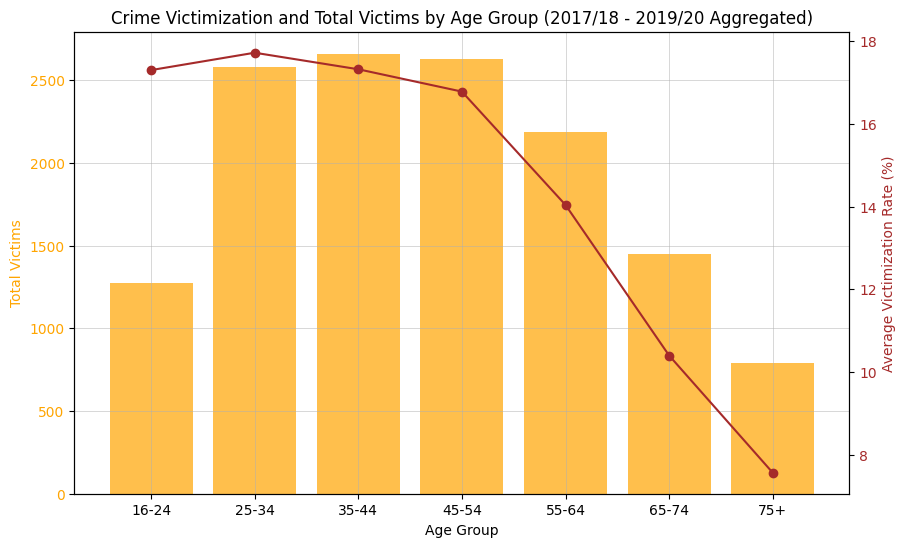

In [2]:
#PLOT ONE

#only uses the latest data in the plot so the data isn't "doubled"
plotOne = crimeData[crimeData['Time'] == "2017/18, 2018/19 and 2019/20"]

#group by age to calculate the overall average value across all ethnicities
averageValues = plotOne.groupby('Age')['Value'].mean()

#group by age to calculate the total victims across all ethnicities
totalVictims = plotOne.groupby('Age')['Victims'].sum()

#remove the records that represent every age group
averageValues = averageValues[averageValues.index != '16+']
totalVictims = totalVictims[totalVictims.index != '16+']


#creating the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

#bar chart for total victims
ax1.bar(totalVictims.index, totalVictims, color='orange', alpha=0.7, label='Total Victims')
ax1.set_ylabel('Total Victims', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

#line chart for average victimization rate
ax2 = ax1.twinx()
ax2.plot(averageValues.index, averageValues, color='brown', marker='o', label='Average Victimization Rate (%)')
ax2.set_ylabel('Average Victimization Rate (%)', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.title('Crime Victimization and Total Victims by Age Group (2017/18 - 2019/20 Aggregated)')
ax1.set_xlabel('Age Group')
ax1.grid(linewidth=0.5, alpha=0.7) 
plt.show()

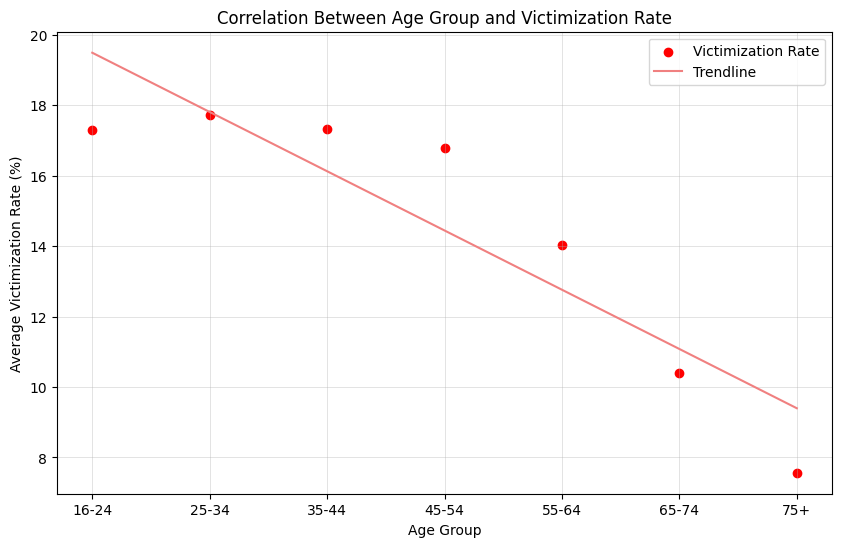

In [3]:
#PLOT TWO / LINEAR REGRESSION MODEL TO SUPPORT PLOT ONE

age_indices = np.arange(len(averageValues))  # Numeric indices for age groups

#fit a linear regression model to the data
coefficients = np.polyfit(age_indices, averageValues.values, 1)
trendline = np.poly1d(coefficients)

#create the plot
plt.figure(figsize=(10, 6))
plt.scatter(age_indices, averageValues.values, color='red', label='Victimization Rate')
plt.plot(age_indices, trendline(age_indices), color='lightcoral', label='Trendline')

#add labels and formatting
plt.title('Correlation Between Age Group and Victimization Rate')
plt.xlabel('Age Group')
plt.ylabel('Average Victimization Rate (%)')
plt.xticks(ticks=age_indices, labels=averageValues.index)
plt.grid(alpha=0.5, linewidth=0.5)
plt.legend()
plt.show()

                                                Measure     Income bracket  \
1210  Average weekly household income by ethnic grou...  GBP 2,000 or more   
1211  Average weekly household income by ethnic grou...  GBP 2,000 or more   
1212  Average weekly household income by ethnic grou...  GBP 2,000 or more   
1213  Average weekly household income by ethnic grou...  GBP 2,000 or more   
1214  Average weekly household income by ethnic grou...  GBP 2,000 or more   

                 Time           Time_type  \
1210  2017/18-2019/20  Three-year average   
1211  2017/18-2019/20  Three-year average   
1212  2017/18-2019/20  Three-year average   
1213  2017/18-2019/20  Three-year average   
1214  2017/18-2019/20  Three-year average   

     Ethnicity of household reference person Ethnicity_type  Geography Value  \
1210                             Asian other        ONS 5+2  K02000001     5   
1211                                   Asian        ONS 5+2  K02000001     9   
1212                

/tmp/ipykernel_89/4113282643.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plotOne['Value'] = pd.to_numeric(plotOne['Value'])


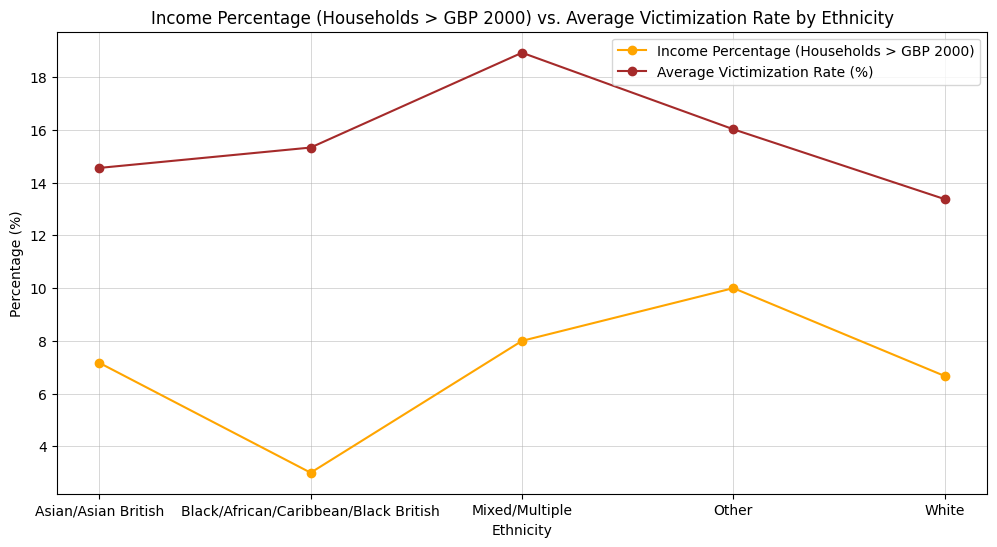

In [4]:
#PLOT THREE

#load the income dataset into a DataFrame
incomeData = pd.read_csv("household-income-2021.csv")

#clean up data to unify it with victim data
incomeData = incomeData[incomeData['Time'] == "2017/18-2019/20"]
incomeData = incomeData[incomeData['Income bracket'] == "GBP 2,000 or more"]

#map ethnicities to match the victim data ethnicities
ethnicityMapping = {
    'All': None,
    'Asian other': 'Asian/Asian British',
    'Asian': 'Asian/Asian British',
    'Bangladeshi': 'Asian/Asian British',
    'Black': 'Black/African/Caribbean/Black British',
    'Chinese': 'Asian/Asian British',
    'Indian': 'Asian/Asian British',
    'Mixed': 'Mixed/Multiple',
    'Other': 'Other',
    'Pakistani': 'Asian/Asian British',
    'White': 'White',
    'White British': 'White',
    'White other': 'White'
}

#apply the ethnicity mapping
incomeData['Ethnicity (Mapped)'] = incomeData['Ethnicity of household reference person'].map(ethnicityMapping)

#removes all as there is no all ethnicity in victim data
incomeData = incomeData[incomeData['Ethnicity (Mapped)'].notna()]

#check if changes have been applied correctly
print(incomeData.head())

#ensure value column is numeric in income and crime data
incomeData['Value'] = pd.to_numeric(incomeData['Value'])
plotOne['Value'] = pd.to_numeric(plotOne['Value'])

#group the income data to calculate the percentage of households earning > GBP 2000 by ethnicity
incomeByEthnicity = incomeData.groupby('Ethnicity (Mapped)')['Value'].mean()

#group the crime data to calculate the average victimization rate by ethnicity
victimRateByEthnicity = plotOne.groupby('Ethnicity')['Value'].mean()

#align the data by matching ethnicities
combinedData = pd.DataFrame({
    'IncomePercentage(Households>GBP2000)': incomeByEthnicity,
    'AverageVictimizationRate(%)': victimRateByEthnicity
}).dropna()

#create the plot
plt.figure(figsize=(12, 6))

#line for income percentages
plt.plot(combinedData.index, combinedData['IncomePercentage(Households>GBP2000)'], marker='o', label='Income Percentage (Households > GBP 2000)', color='orange')

#line for victimization rates
plt.plot(combinedData.index, combinedData['AverageVictimizationRate(%)'], marker='o', label='Average Victimization Rate (%)', color='brown')

#add labels, title, and legend
plt.title('Income Percentage (Households > GBP 2000) vs. Average Victimization Rate by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage (%)')
plt.grid(linewidth=0.5, alpha=0.7)
plt.legend()
plt.show()

/tmp/ipykernel_89/1414043024.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = combinedData['IncomePercentage(Households>GBP2000)'][i]
/tmp/ipykernel_89/1414043024.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = combinedData['AverageVictimizationRate(%)'][i]


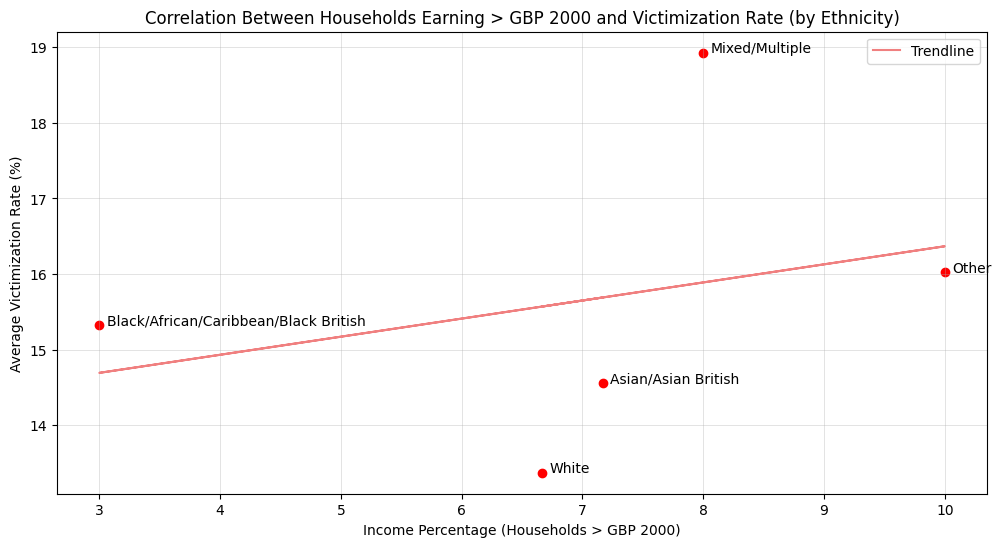

In [5]:
#PLOT FOUR / LINEAR REGRESSION MODEL TO SUPPORT PLOT THREE

#create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(combinedData['IncomePercentage(Households>GBP2000)'], combinedData['AverageVictimizationRate(%)'], color='red')

#fit a regression line
coefficients = np.polyfit(combinedData['IncomePercentage(Households>GBP2000)'], combinedData['AverageVictimizationRate(%)'], 1)
trendline = np.poly1d(coefficients)

#create the plot
xValues = combinedData['IncomePercentage(Households>GBP2000)']
plt.plot(xValues, trendline(xValues), color='lightcoral', label='Trendline')

#annotate each point with its ethnicity
for i, ethnicity in enumerate(combinedData.index):
    x = combinedData['IncomePercentage(Households>GBP2000)'][i]
    y = combinedData['AverageVictimizationRate(%)'][i]
    plt.text(x+0.06, y, ethnicity, fontsize=10, ha='left')

#add labels, title, and legend
plt.title('Correlation Between Households Earning > GBP 2000 and Victimization Rate (by Ethnicity)')
plt.xlabel('Income Percentage (Households > GBP 2000)')
plt.ylabel('Average Victimization Rate (%)')
plt.grid(alpha=0.5,linewidth=0.5)
plt.legend()
plt.show()

                                         Measure  Source  Time Geography  \
94   Population by Ethnicity and Local Authority  Census  2021    London   
97   Population by Ethnicity and Local Authority  Census  2021    London   
257  Population by Ethnicity and Local Authority  Census  2021    London   
261  Population by Ethnicity and Local Authority  Census  2021    London   
266  Population by Ethnicity and Local Authority  Census  2021    London   

    Geography_code Ethnicity Ethnicity_type  Regional Population  \
94       E12000007     White   ONS 2021 5+1              8799736   
97       E12000007     Other   ONS 2021 5+1              8799736   
257      E12000007     Asian   ONS 2021 5+1              8799736   
261      E12000007     Black   ONS 2021 5+1              8799736   
266      E12000007     Mixed   ONS 2021 5+1              8799736   

     Ethnic Population  Total Ethnic Population  Value1  Value1_type  Value2  \
94             4731172                 48699231    53.

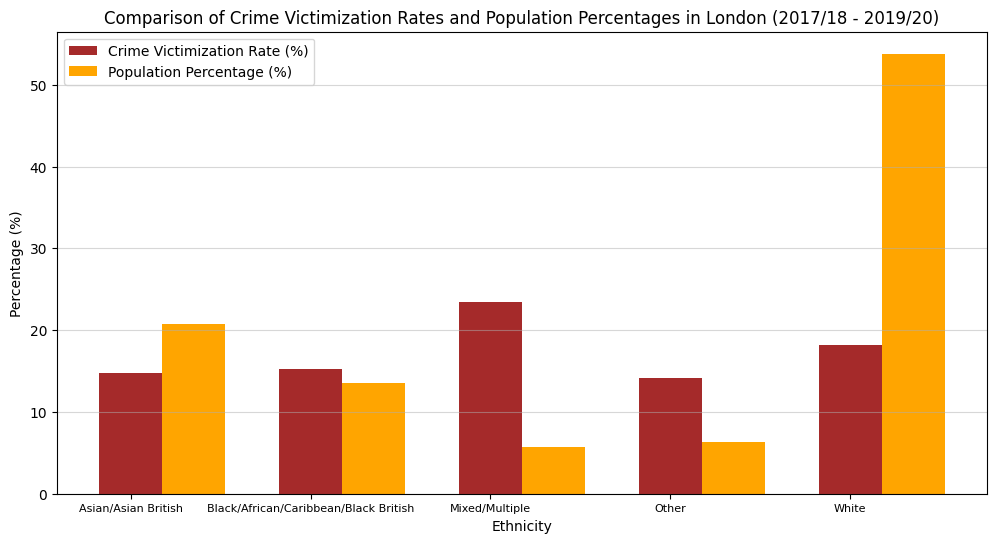

In [6]:
#PLOT FIVE

#load the population dataset
populationData = pd.read_csv("population-by-ethnicity-and-region-2021.csv")

#filter relevant ethnicities
relevantEthnicities = ['White', 'Other', 'Asian', 'Black', 'Mixed']
populationData = populationData[populationData['Ethnicity'].isin(relevantEthnicities)]

#filter to london only
populationData = populationData[populationData['Geography'] == 'London']

#define mapping for these ethnicities to match the crime victim dataset
ethnicityMapping = {
    'White': 'White',
    'Other': 'Other',
    'Asian': 'Asian/Asian British',
    'Black': 'Black/African/Caribbean/Black British',
    'Mixed': 'Mixed/Multiple'
}

#apply the mapping to the filtered population dataset
populationData['Ethnicity (Mapped)'] = populationData['Ethnicity'].map(ethnicityMapping)

#check the mapped dataset
print(populationData)

#filter crime data for London and the specified time range
londonCrimeData = crimeData[(crimeData['Geography'] == 'London') & (crimeData['Time'] == "2017/18, 2018/19 and 2019/20")]

#group crime data by ethnicity to calculate the average victimization rate in London
londonCrimeByEthnicity = londonCrimeData.groupby('Ethnicity')['Value'].mean().reset_index()
londonCrimeByEthnicity.rename(columns={'Value': 'CrimeVictimizationRate(%)'}, inplace=True)

#calculate the ethnic population percentages in London
populationPercentages = populationData.groupby('Ethnicity (Mapped)')['Value1'].mean().reset_index()
populationPercentages.rename(columns={'Ethnicity (Mapped)': 'Ethnicity', 'Value1': 'PopulationPercentage(%)'}, inplace=True)

#merge the crime and population data for comparison
comparisonData = pd.merge(londonCrimeByEthnicity, populationPercentages, on='Ethnicity', how='inner')

#create a grouped bar chart to compare victimization rates and population percentages
plt.figure(figsize=(12, 6))
x = np.arange(len(comparisonData['Ethnicity']))

#bars for crime victimization rates
plt.bar(x, comparisonData['CrimeVictimizationRate(%)'], 0.35, label='Crime Victimization Rate (%)', color = 'brown')

#bars for population percentages
plt.bar(x + 0.35, comparisonData['PopulationPercentage(%)'], 0.35, label='Population Percentage (%)', color = 'orange')

#add labels, title, and legend
plt.xticks(x, comparisonData['Ethnicity'], fontsize = 8)
plt.xlabel('Ethnicity')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Crime Victimization Rates and Population Percentages in London (2017/18 - 2019/20)')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()
